# LASSO Regression

In this notebook, I take the raw water structure data and perform LASSO regression using hydration free energies, $\mu_{\nu}$, as labels.

## IMPORT MODULES

In [1]:
## MAKE MATPLOTLIB INLINE
%matplotlib inline

## IMPORT OS
import os

## IMPORT RANDOM
import random

## IMPORT NUMPY
import numpy as np  # Used to do math functions

## IMPORT PANDAS
import pandas as pd

## IMPORT LASSO K-FOLD
from sam_analysis.ml_tools.lasso_regression import LassoRegression

## IMPORT GLOBAL INPUTS
from sam_analysis.ml_tools.globals import NH2_GROUPS, CONH2_GROUPS, OH_GROUPS

## FUNCTION TO SAVE AND LOAD PICKLE FILES
from sam_analysis.core.pickles import load_pkl

## IMPORT CHECK SERVER PATH
from sam_analysis.core.check_tools import check_server_path

## IMPORT PLOTTING TOOLS
from sam_analysis.plotting.plots import plot_parity, plot_bar, plot_line

## SET PATHS AND LOAD DATA
NOTE: "raw_regression_data.pkl" was converted into a pd.dataframe post analysis. Will need to change output of analysis to the data frame to facitate analysis and reproducibility.

In [2]:
## WORKING DIRECTORY
project_dir = r"/home/bdallin/python_projects/sam_analysis/sam_analysis"
data_dir    = "raw_data"

## DATA FILE
data_pkl = r"rescaled_uncorrelated_regression_data.pkl"

## FIGURE PATHS
manuscript_dir = r"/mnt/c/Users/bdallin/Box Sync/univ_of_wisc/manuscripts/chemically_heterogeneous_sams"
figure_dir     = r"figures"

## LOAD DATA
path_data_pkl = os.path.join( project_dir, data_dir, data_pkl )
raw_data      = load_pkl( path_data_pkl )

LOADING PKL FILE...
LOADED PKL FROM /home/bdallin/python_projects/sam_analysis/sam_analysis/raw_data/rescaled_uncorrelated_regression_data.pkl



## TRAIN LASSO REGRESSION

In [3]:
## OPTIMAL HYPERPARAMETERS
alpha     = 1.45  # regularization constant
tol       = 1e-5 # lasso tolerance
max_iter  = 5000 # lasso maximum iteration, if tol not met

## INITIALIZE LASSO
lasso_obj = LassoRegression( alpha     = alpha,
                             tol       = tol,
                             max_iter  = max_iter )

## COMPUTE LASSO REGRESSION
lasso_obj.compute( raw_data )

## UPDATE COLOR LIST
colors = []
for gg in range(len(raw_data["sample1"].index.values)):
    if gg in NH2_GROUPS and gg != 0:
        colors.append( "slateblue" )
    if gg in CONH2_GROUPS and gg != 0:
        colors.append( "darkseagreen" )
    if gg in OH_GROUPS and gg != 0:
        colors.append( "tomato" )
    if gg == 0:
        colors.append( "darkgrey" )

## STORE RESULTS
y_indus     = lasso_obj.y_indus
y_indus_err = lasso_obj.y_indus_err
y_pred      = lasso_obj.y_pred
y_pred_err  = lasso_obj.y_pred_err
rmse        = lasso_obj.rmse
rmse_err    = lasso_obj.rmse_err
weights     = lasso_obj.weights
weights_err = lasso_obj.weights_err

## PLOTTING PARITY


--- CREATING PARITY PLOT ---
2
2
2
2
FIGURE SAVED TO: /mnt/c/Users/bdallin/Box Sync/univ_of_wisc/manuscripts/chemically_heterogeneous_sams/figures/lasso_parity_a_eq_1.45


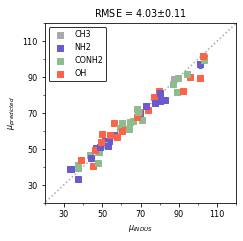

In [4]:
## PLOT PARITY
fig_path = os.path.join( manuscript_dir, figure_dir, "lasso_parity_a_eq_{:.2f}".format( alpha ) )
plot_parity( y_indus, y_pred,
             xerr     = y_indus_err,
             yerr     = y_pred_err,
             title    = r"RMSE = {:.2f}$\pm${:.2f}".format( rmse, rmse_err ),
             xlabel   = r"$\mu_{INDUS}$",
             ylabel   = r"$\mu_{predicted}$",
             xticks   = [ 30, 110, 20 ],
             yticks   = [ 30, 110, 20 ],
             colors   = colors,
             legend   = [ [ "darkgrey", "slateblue", "darkseagreen", "tomato" ],
                          [ "CH3", "NH2", "CONH2", "OH" ] ],
             fig_path = fig_path, )

## PLOTTING FEATURE WEIGHTS


--- CREATING BAR PLOT ---
FIGURE SAVED TO: /mnt/c/Users/bdallin/Box Sync/univ_of_wisc/manuscripts/chemically_heterogeneous_sams/figures/lasso_weights_a_eq_1.45


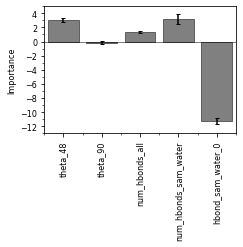

In [5]:
## PLOT WEIGHTS
mask             = np.abs( weights ) > 0.
non_zero_weights = weights[ mask ]
non_zero_err     = weights_err[ mask ]
non_zero_labels  = list(weights.index.values[ mask ])

## PLOT
fig_path = os.path.join( manuscript_dir, figure_dir, "lasso_weights_a_eq_{:.2f}".format( alpha ) )
plot_bar( [ np.arange( 0, len(non_zero_weights), 1 ) ],
          [ non_zero_weights ], 
          yerr     = [ non_zero_err ],
          xlabel   = non_zero_labels,
          ylabel   = r"Importance",
          yticks   = [  -12,  4,  2 ],
          colors   = [ "grey" ],
          fig_path = fig_path )

## OPTIMIZE HYPERPARAMETERS

In [6]:
## INITIAL HYPERPARAMETERS
alpha     = 1.45 # regularization constant
tol       = 1e-5 # lasso tolerance
max_iter  = 5000 # lasso maximum iteration, if tol not met

### CHECK TRAINING DATA SIZE

In [7]:
## MAX NUMBER
n_samples_max = 58

## CREATE DATA HOLDERS
train_sizes   = np.arange( 1, n_samples_max+1, 1 )
rmse_size     = []
rmse_size_err = []

## INITIALIZE LASSO
lasso_obj = LassoRegression( alpha     = alpha,
                             tol       = tol,
                             max_iter  = max_iter )

## LOOP THROUGH TRAINING SIZE
for ii in train_sizes:
    ## COMPUTE LASSO
    lasso_obj.compute( raw_data, n_samples = ii )
    
    ## STORE RESULTS
    rmse_size.append( lasso_obj.rmse )
    rmse_size_err.append( lasso_obj.rmse_err )

## CONVERT TO NUMPY ARRAYS
rmse_size     = np.array( rmse_size )
rmse_size_err = np.array( rmse_size_err )

/home/bdallin/miniconda3/envs/sam_analysis/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/home/bdallin/miniconda3/envs/sam_analysis/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/home/bdallin/miniconda3/envs/sam_analysis/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)



--- CREATING LINE PLOT ---
FIGURE SAVED TO: /mnt/c/Users/bdallin/Box Sync/univ_of_wisc/manuscripts/chemically_heterogeneous_sams/figures/lasso_training_size_cv_a_eq_1.45


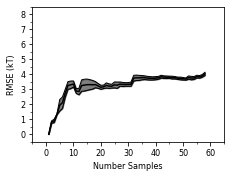

In [8]:
## PLOT LINE
fig_path = os.path.join( manuscript_dir, figure_dir, "lasso_training_size_cv_a_eq_{:.2f}".format( alpha ) )
plot_line( [ train_sizes, ], 
           [ rmse_size, ],
           yerr        = [ rmse_size_err, ],
           xlabel      = r"Number Samples",
           ylabel      = r"RMSE (kT)",
           xticks      = [ 0, 60, 10 ],
           yticks      = [ 0, 8, 1 ],
           colors      = [ "black" ],
           line_labels = None,
           fig_path    = fig_path, )

### REGULARIZATION CROSS-VALIDATION

In [9]:
## MAX ALPHA
alpha_max = 10

## CREATE DATA HOLDERS
alphas         = np.arange( 0.1, alpha_max+0.1, 0.1 )
rmse_alpha     = []
rmse_alpha_err = []
num_features   = []

## LOOP THROUGH ALPHAS
for aa in alphas:
    ## INITIALIZE LASSO
    lasso_obj = LassoRegression( alpha    = aa,
                                 tol      = tol,
                                 max_iter = max_iter )

    ## COMPUTE 5-FOLD CV USING LASSO
    lasso_obj.compute( raw_data )

    ## STORE RESULTS
    rmse_alpha.append( lasso_obj.rmse )
    rmse_alpha_err.append( lasso_obj.rmse_err )
    num_features.append( np.sum( np.abs(lasso_obj.weights) > 0 ) )

## CONVERT TO NUMPY ARRAYS
rmse_alpha     = np.array( rmse_alpha )
rmse_alpha_err = np.array( rmse_alpha_err )
num_features   = np.array( num_features )


--- CREATING LINE PLOT ---
FIGURE SAVED TO: /mnt/c/Users/bdallin/Box Sync/univ_of_wisc/manuscripts/chemically_heterogeneous_sams/figures/lasso_alpha_cv_rmse

--- CREATING LINE PLOT ---
FIGURE SAVED TO: /mnt/c/Users/bdallin/Box Sync/univ_of_wisc/manuscripts/chemically_heterogeneous_sams/figures/lasso_alpha_cv_num_features


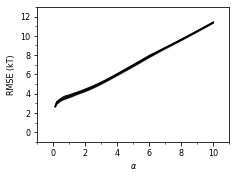

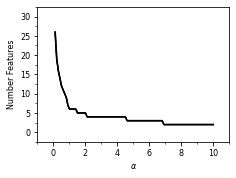

In [10]:
## PLOT LINE
fig_path = os.path.join( manuscript_dir, figure_dir, "lasso_alpha_cv_rmse" )
plot_line( [ alphas, ], 
           [ rmse_alpha, ],
           yerr        = [ rmse_alpha_err, ],
           xlabel      = r"$\alpha$",
           ylabel      = r"RMSE (kT)",
           xticks      = [ 0, 10, 2 ],
           yticks      = [ 0, 12, 2 ],
           colors      = [ "black" ],
           line_labels = None,
           fig_path    = fig_path, )

## PLOT LINE
fig_path = os.path.join( manuscript_dir, figure_dir, "lasso_alpha_cv_num_features" )
plot_line( [ alphas, ], 
           [ num_features, ],
           yerr        = [],
           xlabel      = r"$\alpha$",
           ylabel      = r"Number Features",
           xticks      = [ 0, 10, 2 ],
           yticks      = [ 0, 30, 5 ],
           colors      = [ "black" ],
           line_labels = None,
           fig_path    = fig_path, )